# Identifying clusters in Iris dataset

Aim :- Identify the number of clusters using k-means clustering

In [83]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading Data

In [84]:
# load_iris is used to load data
# iris.feature_names is used to specifically select required features

iris = datasets.load_iris()

iris_df = pd.read_csv(r"C:\Users\Rohan Singh Chouhan\Desktop\The Sparks Foundation\Dataset\Iris.csv")
iris_df1 = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [85]:
# using iloc we slice all rows and column to create a 2D array

data = iris_df1.iloc[:,:].values
y = iris_df['Species'].values
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Clustering

In [86]:
# in KMeans n_clusters is, the number of clusters to form as well as the number of centroids to generate.
# init k-means++ selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# max_iter is the number of iteration per run i.e. same as steps per epochs
# n_init is the number of runs i.e. same as epochs
# randomness of data is set to 0
# We are using a for loop to increment the n_clusters parameter in KMeans

# we simply are fitting data with every model with different no. of clusters every time
# in wcss list we append kmeans.inertia, which is the best value in every run
# thus for 15 runs it will append 15 values


wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init= 10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

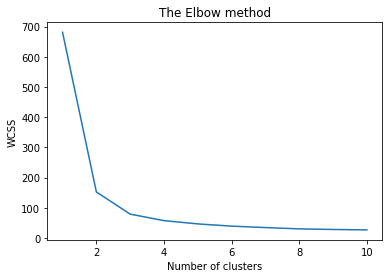

In [87]:
# Plotting the graph

plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# The graph of the elbow method tells us that the no. of clutsers where elbow is formed is our optimum no. of clusters
# Elbow is where the dip ends

In [88]:
# From graph it is clear that our optimum no. of clusters is 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 400, n_init = 10, random_state = 0)
y_kmean = kmeans.fit_predict(data)
print(y_kmean)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


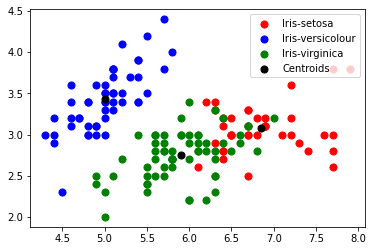

In [89]:
# Visualising the clusters
# We have created a y_kmean model which when given data, provides predicted value
# thus we input y_kmean with data, y_kmean == 0,0 means 0th row, 0th column i.e.
# s is the size of plotting dots

plt.scatter(data[y_kmean == 0, 0], data[y_kmean == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(data[y_kmean == 1, 0], data[y_kmean == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[y_kmean == 2, 0], data[y_kmean == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'Centroids')

plt.legend(loc='upper right')

## Model

Now we will make a naive-bayes model to classify into different classes

In [90]:
# Spliting data 

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [91]:
# StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1.
# In short, it standardizes the data.


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
# Using Bayes method for prediction

nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [93]:
# Predicting Data

y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [94]:
# Accuracy

accuracy_score(y_pred, y_test)

0.9666666666666667

In [95]:
# Score return the mean accuracy on the given test data and labels. 

nvclassifier.score(X_train, y_train)

0.95

In [96]:
# confusion_matrix tells 4 things, true -ve, true +ve, false -ve, false +ve
# true -ve is when acutal no is predicted no
# true +ve is when actual yes is predicted yes
# false -ve is when actual yes is predicted no
# false +ve is when actual no is predicted yes

confusion_matrix(y_pred, y_test)

array([[11,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  5]], dtype=int64)

In [97]:
# Full Report

print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30

